In [1]:
import gensim

In [2]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

model = LdaModel(common_corpus, 5, common_dictionary)
cm = CoherenceModel(model=model, corpus=common_corpus, coherence='u_mass')
coherence = cm.get_coherence()

In [3]:
model

In [4]:
cm

In [5]:
coherence

-14.679371186797123

In [23]:
dict(common_dictionary)

{0: 'computer',
 1: 'human',
 2: 'interface',
 3: 'response',
 4: 'survey',
 5: 'system',
 6: 'time',
 7: 'user',
 8: 'eps',
 9: 'trees',
 10: 'graph',
 11: 'minors'}

In [24]:
common_corpus

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]

<h1> Gensim Core Concepts

In [25]:
import pprint

In [26]:
document = "Human machine interface for lab abc computer applications"

In [27]:
text_corpus = [    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

In [28]:
stoplist = set('for a of the and to in'.split(' '))

In [29]:
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in text_corpus]
texts

[['human', 'machine', 'interface', 'lab', 'abc', 'computer', 'applications'],
 ['survey', 'user', 'opinion', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'management', 'system'],
 ['system', 'human', 'system', 'engineering', 'testing', 'eps'],
 ['relation', 'user', 'perceived', 'response', 'time', 'error', 'measurement'],
 ['generation', 'random', 'binary', 'unordered', 'trees'],
 ['intersection', 'graph', 'paths', 'trees'],
 ['graph', 'minors', 'iv', 'widths', 'trees', 'well', 'quasi', 'ordering'],
 ['graph', 'minors', 'survey']]

In [30]:
# Count Word Frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1
frequency

defaultdict(int,
            {'human': 2,
             'machine': 1,
             'interface': 2,
             'lab': 1,
             'abc': 1,
             'computer': 2,
             'applications': 1,
             'survey': 2,
             'user': 3,
             'opinion': 1,
             'system': 4,
             'response': 2,
             'time': 2,
             'eps': 2,
             'management': 1,
             'engineering': 1,
             'testing': 1,
             'relation': 1,
             'perceived': 1,
             'error': 1,
             'measurement': 1,
             'generation': 1,
             'random': 1,
             'binary': 1,
             'unordered': 1,
             'trees': 3,
             'intersection': 1,
             'graph': 3,
             'paths': 1,
             'minors': 2,
             'iv': 1,
             'widths': 1,
             'well': 1,
             'quasi': 1,
             'ordering': 1})

In [31]:
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
processed_corpus

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [32]:
from gensim import corpora
# Associate each word with a unique integer ID
dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...)


In [33]:
dictionary.token2id

{'computer': 0,
 'human': 1,
 'interface': 2,
 'response': 3,
 'survey': 4,
 'system': 5,
 'time': 6,
 'user': 7,
 'eps': 8,
 'trees': 9,
 'graph': 10,
 'minors': 11}

In [35]:
new_doc  = "Human Computer Interaction"
new_vec = dictionary.doc2bow(new_doc.lower().split())
new_vec

[(0, 1), (1, 1)]

In [36]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
bow_corpus

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]

In [42]:
from gensim import models

tfidf = models.TfidfModel(bow_corpus)
words = 'system minors'.lower().split()
tfidf[dictionary.doc2bow(words)]

[(5, 0.5898341626740045), (11, 0.8075244024440723)]

In [55]:
from gensim import similarities
# Index the entire corpus
index = similarities.SparseMatrixSimilarity(tfidf[bow_corpus], num_features=len(dictionary))
# list(index)

In [56]:
query_doc = 'system engineering'.split()
query_bow = dictionary.doc2bow(query_doc)
sims = index[tfidf[query_bow]]
list(enumerate(sims))

[(0, 0.0),
 (1, 0.32448703),
 (2, 0.41707572),
 (3, 0.7184812),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0)]

In [58]:
# Our document is most similar to document 3 by tfidf similarity score
sorted(enumerate(sims), key=lambda x: x[1], reverse=True)

[(3, 0.7184812),
 (2, 0.41707572),
 (1, 0.32448703),
 (0, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0)]

<h1> Corpora and Vector Spaces

In [59]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [60]:
documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

In [75]:
from pprint import pprint  # pretty-printer
from collections import defaultdict

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

Had to skip some stuff since links were broken to mycorpus.txt

In [77]:
import gensim
import numpy as np
numpy_matrix = np.random.randint(10, size=[5, 2])  # random matrix as an example
corpus = gensim.matutils.Dense2Corpus(numpy_matrix)
corpus.dense

array([[9, 1, 7, 7, 8],
       [8, 1, 4, 3, 5]])

In [88]:
# This cell might also be broken
import scipy
scipy_sparse_matrix = scipy.sparse.random(10, 2)  # random sparse matrix as example
print(scipy_sparse_matrix)
corpus = gensim.matutils.Sparse2Corpus(scipy_sparse_matrix)
print(corpus)
scipy_csc_matrix = gensim.matutils.corpus2csc(corpus)
scipy_csc_matrix

<0x2 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Column format>

<h1> Topic and Transformations

In [90]:
from collections import defaultdict
from gensim import corpora

documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

2020-04-01 19:43:09,994 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-01 19:43:09,995 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)


In [107]:
pprint(corpus)
pprint(dict(dictionary))

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]
{0: 'computer',
 1: 'human',
 2: 'interface',
 3: 'response',
 4: 'survey',
 5: 'system',
 6: 'time',
 7: 'user',
 8: 'eps',
 9: 'trees',
 10: 'graph',
 11: 'minors'}


In [108]:
tfidf = models.TfidfModel(corpus)

2020-04-01 19:45:54,576 : INFO : collecting document frequencies
2020-04-01 19:45:54,577 : INFO : PROGRESS: processing document #0
2020-04-01 19:45:54,578 : INFO : calculating IDF weights for 9 documents and 12 features (28 matrix non-zeros)


In [118]:
doc_bow = [(0, 1), (1, 1)]
print(tfidf[doc_bow])

[(0, 0.7071067811865476), (1, 0.7071067811865476)]


In [136]:
corpus_tfidf = tfidf[corpus]
corpora.MmCorpus.serialize('corpus.mm', corpus_tfidf)

2020-04-01 19:52:55,397 : INFO : storing corpus in Matrix Market format to corpus.mm
2020-04-01 19:52:55,398 : INFO : saving sparse matrix to corpus.mm
2020-04-01 19:52:55,399 : INFO : PROGRESS: saving document #0
2020-04-01 19:52:55,400 : INFO : saved 9x12 matrix, density=25.926% (28/108)
2020-04-01 19:52:55,401 : INFO : saving MmCorpus index to corpus.mm.index


In [140]:
corpus_loaded = corpora.MmCorpus('corpus.mm')
list(corpus_loaded)

2020-04-01 19:54:03,811 : INFO : loaded corpus index from corpus.mm.index
2020-04-01 19:54:03,811 : INFO : initializing cython corpus reader from corpus.mm
2020-04-01 19:54:03,812 : INFO : accepted corpus with 9 documents, 12 features, 28 non-zero entries


[[(0, 0.5773502691896257), (1, 0.5773502691896257), (2, 0.5773502691896257)],
 [(0, 0.44424552527467476),
  (3, 0.44424552527467476),
  (4, 0.44424552527467476),
  (5, 0.3244870206138555),
  (6, 0.44424552527467476),
  (7, 0.3244870206138555)],
 [(2, 0.5710059809418182),
  (5, 0.4170757362022777),
  (7, 0.4170757362022777),
  (8, 0.5710059809418182)],
 [(1, 0.49182558987264147), (5, 0.7184811607083769), (8, 0.49182558987264147)],
 [(3, 0.6282580468670046), (6, 0.6282580468670046), (7, 0.45889394536615247)],
 [(9, 1.0)],
 [(9, 0.7071067811865475), (10, 0.7071067811865475)],
 [(9, 0.5080429008916749), (10, 0.5080429008916749), (11, 0.695546419520037)],
 [(4, 0.6282580468670046),
  (10, 0.45889394536615247),
  (11, 0.6282580468670046)]]

In [142]:
list(corpus_tfidf)

[[(0, 0.5773502691896257), (1, 0.5773502691896257), (2, 0.5773502691896257)],
 [(0, 0.44424552527467476),
  (3, 0.44424552527467476),
  (4, 0.44424552527467476),
  (5, 0.3244870206138555),
  (6, 0.44424552527467476),
  (7, 0.3244870206138555)],
 [(2, 0.5710059809418182),
  (5, 0.4170757362022777),
  (7, 0.4170757362022777),
  (8, 0.5710059809418182)],
 [(1, 0.49182558987264147), (5, 0.7184811607083769), (8, 0.49182558987264147)],
 [(3, 0.6282580468670046), (6, 0.6282580468670046), (7, 0.45889394536615247)],
 [(9, 1.0)],
 [(9, 0.7071067811865475), (10, 0.7071067811865475)],
 [(9, 0.5080429008916749), (10, 0.5080429008916749), (11, 0.695546419520037)],
 [(4, 0.6282580468670046),
  (10, 0.45889394536615247),
  (11, 0.6282580468670046)]]

In [143]:
# Transform TfIdf corpus into latent 2-D space using LSI
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2)

2020-04-01 19:56:17,358 : INFO : using serial LSI version on this node
2020-04-01 19:56:17,359 : INFO : updating model with new documents
2020-04-01 19:56:17,360 : INFO : preparing a new chunk of documents
2020-04-01 19:56:17,360 : INFO : using 100 extra samples and 2 power iterations
2020-04-01 19:56:17,361 : INFO : 1st phase: constructing (12, 102) action matrix
2020-04-01 19:56:17,363 : INFO : orthonormalizing (12, 102) action matrix
2020-04-01 19:56:17,449 : INFO : 2nd phase: running dense svd on (12, 9) matrix
2020-04-01 19:56:17,454 : INFO : computing the final decomposition
2020-04-01 19:56:17,455 : INFO : keeping 2 factors (discarding 47.565% of energy spectrum)
2020-04-01 19:56:17,460 : INFO : processed documents up to #9
2020-04-01 19:56:17,461 : INFO : topic #0(1.594): 0.703*"trees" + 0.538*"graph" + 0.402*"minors" + 0.187*"survey" + 0.061*"system" + 0.060*"response" + 0.060*"time" + 0.058*"user" + 0.049*"computer" + 0.035*"interface"
2020-04-01 19:56:17,462 : INFO : topic #

In [146]:
lsi_model.print_topics(2)

2020-04-01 19:58:05,562 : INFO : topic #0(1.594): 0.703*"trees" + 0.538*"graph" + 0.402*"minors" + 0.187*"survey" + 0.061*"system" + 0.060*"response" + 0.060*"time" + 0.058*"user" + 0.049*"computer" + 0.035*"interface"
2020-04-01 19:58:05,563 : INFO : topic #1(1.476): -0.460*"system" + -0.373*"user" + -0.332*"eps" + -0.328*"interface" + -0.320*"response" + -0.320*"time" + -0.293*"computer" + -0.280*"human" + -0.171*"survey" + 0.161*"trees"


[(0,
  '0.703*"trees" + 0.538*"graph" + 0.402*"minors" + 0.187*"survey" + 0.061*"system" + 0.060*"response" + 0.060*"time" + 0.058*"user" + 0.049*"computer" + 0.035*"interface"'),
 (1,
  '-0.460*"system" + -0.373*"user" + -0.332*"eps" + -0.328*"interface" + -0.320*"response" + -0.320*"time" + -0.293*"computer" + -0.280*"human" + -0.171*"survey" + 0.161*"trees"')]

In [149]:
corpus_lsi = lsi_model[corpus_tfidf]
list(corpus_lsi)

[[(0, 0.06600783396090135), (1, -0.5200703306361859)],
 [(0, 0.1966759285914224), (1, -0.7609563167700061)],
 [(0, 0.08992639972446098), (1, -0.7241860626752515)],
 [(0, 0.0758584765217788), (1, -0.6320551586003432)],
 [(0, 0.10150299184979951), (1, -0.5737308483002963)],
 [(0, 0.7032108939378316), (1, 0.1611518021402547)],
 [(0, 0.8774787673119839), (1, 0.16758906864659018)],
 [(0, 0.9098624686818586), (1, 0.14086553628718618)],
 [(0, 0.6165825350569285), (1, -0.05392907566389632)]]

In [152]:
for doc, as_text in zip(corpus_lsi, documents):
    print(doc, as_text)

[(0, 0.06600783396090135), (1, -0.5200703306361859)] Human machine interface for lab abc computer applications
[(0, 0.1966759285914224), (1, -0.7609563167700061)] A survey of user opinion of computer system response time
[(0, 0.08992639972446098), (1, -0.7241860626752515)] The EPS user interface management system
[(0, 0.0758584765217788), (1, -0.6320551586003432)] System and human system engineering testing of EPS
[(0, 0.10150299184979951), (1, -0.5737308483002963)] Relation of user perceived response time to error measurement
[(0, 0.7032108939378316), (1, 0.1611518021402547)] The generation of random binary unordered trees
[(0, 0.8774787673119839), (1, 0.16758906864659018)] The intersection graph of paths in trees
[(0, 0.9098624686818586), (1, 0.14086553628718618)] Graph minors IV Widths of trees and well quasi ordering
[(0, 0.6165825350569285), (1, -0.05392907566389632)] Graph minors A survey


Skipped available transformation. That comes later in more depth

<h1> Similarity Queries

In [159]:
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)

2020-04-01 20:07:49,812 : INFO : using serial LSI version on this node
2020-04-01 20:07:49,813 : INFO : updating model with new documents
2020-04-01 20:07:49,813 : INFO : preparing a new chunk of documents
2020-04-01 20:07:49,814 : INFO : using 100 extra samples and 2 power iterations
2020-04-01 20:07:49,815 : INFO : 1st phase: constructing (12, 102) action matrix
2020-04-01 20:07:49,815 : INFO : orthonormalizing (12, 102) action matrix
2020-04-01 20:07:49,817 : INFO : 2nd phase: running dense svd on (12, 9) matrix
2020-04-01 20:07:49,818 : INFO : computing the final decomposition
2020-04-01 20:07:49,818 : INFO : keeping 2 factors (discarding 43.156% of energy spectrum)
2020-04-01 20:07:49,819 : INFO : processed documents up to #9
2020-04-01 20:07:49,820 : INFO : topic #0(3.341): 0.644*"system" + 0.404*"user" + 0.301*"eps" + 0.265*"time" + 0.265*"response" + 0.240*"computer" + 0.221*"human" + 0.206*"survey" + 0.198*"interface" + 0.036*"graph"
2020-04-01 20:07:49,821 : INFO : topic #1(2

In [160]:
doc = "Human computer interaction"
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
print(vec_lsi)

[(0, 0.461821004532716), (1, 0.0700276652789995)]


In [161]:
index = similarities.MatrixSimilarity(lsi[corpus]) # using cosine similarity

2020-04-01 20:08:57,613 : WARNING : scanning corpus to determine the number of features (consider setting `num_features` explicitly)
2020-04-01 20:08:57,623 : INFO : creating matrix with 9 documents and 2 features


In [165]:
sims = index[vec_lsi]
sims

array([ 0.998093  ,  0.93748635,  0.9984453 ,  0.9865886 ,  0.90755945,
       -0.12416792, -0.10639259, -0.09879464,  0.05004176], dtype=float32)

In [166]:
sorted(enumerate(sims), key=lambda item: -item[1])

[(2, 0.9984453),
 (0, 0.998093),
 (3, 0.9865886),
 (1, 0.93748635),
 (4, 0.90755945),
 (8, 0.050041765),
 (7, -0.09879464),
 (6, -0.10639259),
 (5, -0.12416792)]

<h1> Word2Vec

In [4]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [21]:
for i, word in enumerate(wv.vocab):
    if i == 10:
        break
    print(word)

</s>
in
for
that
is
on
##
The
with
said


300

In [6]:
vec_king = wv['king']
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [7]:
try:
    vec_cameroon = wv['cameroon']
except KeyError:
    print("The word 'cameroon' does not appear in this model")

The word 'cameroon' does not appear in this model


In [8]:
pairs = [    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


In [9]:
print(wv.most_similar(positive=['car', 'minivan'], topn=5))

[('SUV', 0.8532191514968872), ('vehicle', 0.8175784349441528), ('pickup_truck', 0.7763689160346985), ('Jeep', 0.7567334175109863), ('Ford_Explorer', 0.7565719485282898)]


In [10]:
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

car


C:\Users\Khachatur\Miniconda3\envs\tensorflow\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [3]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus(object):
    """An interator that yields sentences (lists of str)."""

    def __iter__(self):
        corpus_path = datapath('lee_background.cor')
        for line in open(corpus_path):
            # assume there's one document per line, tokens separated by whitespace
            yield utils.simple_preprocess(line)

In [4]:
import gensim.models

sentences = MyCorpus()
model = gensim.models.Word2Vec(sentences=sentences)

In [5]:
import numpy as np
vec_king = model.wv['king']

In [6]:
for i, word in enumerate(model.wv.vocab):
    if i == 10:
        break
    print(word)

hundreds
of
people
have
been
forced
to
their
homes
in


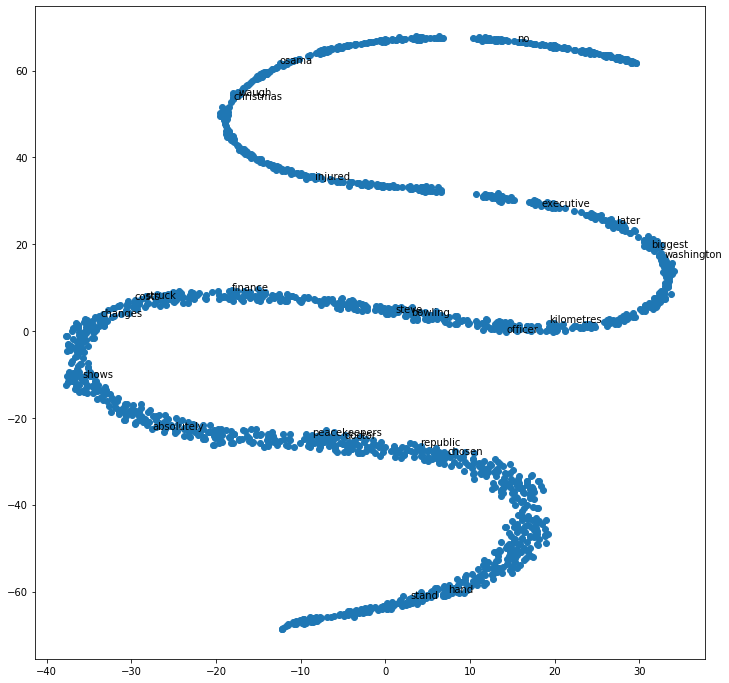

In [7]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

plot_with_matplotlib(x_vals, y_vals, labels)


<h1> Doc2Vec

In [26]:
import os
import gensim
# Set file names for train and test data
test_data_dir = os.path.join(gensim.__path__[0], 'test', 'test_data')
lee_train_file = os.path.join(test_data_dir, 'lee_background.cor')
lee_test_file = os.path.join(test_data_dir, 'lee.cor')

In [27]:
import smart_open

def read_corpus(fname, tokens_only=False):
    with smart_open.open(fname, encoding="iso-8859-1") as f:
        for i, line in enumerate(f):
            tokens = gensim.utils.simple_preprocess(line)
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

In [28]:
train_corpus = list(read_corpus(lee_train_file))
test_corpus = list(read_corpus(lee_test_file, tokens_only=True))

In [29]:
train_corpus[3]

TaggedDocument(words=['argentina', 'political', 'and', 'economic', 'crisis', 'has', 'deepened', 'with', 'the', 'resignation', 'of', 'its', 'interim', 'president', 'who', 'took', 'office', 'just', 'week', 'ago', 'aldolfo', 'rodregiuez', 'saa', 'told', 'stunned', 'nation', 'that', 'he', 'could', 'not', 'rescue', 'argentina', 'because', 'key', 'fellow', 'peronists', 'would', 'not', 'support', 'his', 'default', 'on', 'massive', 'foreign', 'debt', 'repayment', 'or', 'his', 'plan', 'for', 'new', 'currency', 'it', 'was', 'only', 'week', 'ago', 'that', 'he', 'was', 'promising', 'million', 'new', 'jobs', 'to', 'end', 'four', 'years', 'of', 'recession', 'days', 'after', 'his', 'predecessor', 'resigned', 'following', 'series', 'of', 'failed', 'rescue', 'packages', 'after', 'announcing', 'that', 'the', 'senate', 'leader', 'ramon', 'puerta', 'would', 'assume', 'the', 'presidency', 'until', 'congress', 'appoints', 'new', 'caretaker', 'president', 'the', 'government', 'said', 'he', 'too', 'had', 'qui

In [30]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)

In [31]:
model.build_vocab(train_corpus)

In [32]:
len(model.wv.vocab)

3955

In [33]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [34]:
vector = model.infer_vector(['only', 'you', 'can', 'prevent', 'forest', 'fires'])
print(vector)

[-0.03030773 -0.05393341 -0.13382047 -0.04441775  0.22714497  0.09742558
  0.14442702  0.05052727  0.02953425 -0.0934954   0.08715063 -0.13288651
 -0.07523406  0.04768296  0.18364494  0.17692944  0.04612937 -0.0701591
  0.11088675 -0.38414133 -0.11857495  0.07786534 -0.2572298  -0.03044146
 -0.06027896 -0.2198638  -0.03219892  0.20376648  0.00517268 -0.11205857
  0.03470736  0.12120346 -0.0237193   0.00904524 -0.07099169  0.03126359
 -0.24987783  0.3558425  -0.10321619  0.08093851  0.05007556 -0.16718146
  0.0469365   0.08548426 -0.13120362 -0.09851377 -0.25928763  0.05998456
  0.05889411  0.0781127 ]


In [35]:
ranks = []
second_ranks = []
for doc_id in range(len(train_corpus)):
    inferred_vector = model.infer_vector(train_corpus[doc_id].words)
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)

    second_ranks.append(sims[1])

In [36]:
import collections

counter = collections.Counter(ranks)
print(counter)

Counter({0: 292, 1: 8})


In [37]:
print('Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))

Document (299): «australia will take on france in the doubles rubber of the davis cup tennis final today with the tie levelled at wayne arthurs and todd woodbridge are scheduled to lead australia in the doubles against cedric pioline and fabrice santoro however changes can be made to the line up up to an hour before the match and australian team captain john fitzgerald suggested he might do just that we ll make team appraisal of the whole situation go over the pros and cons and make decision french team captain guy forget says he will not make changes but does not know what to expect from australia todd is the best doubles player in the world right now so expect him to play he said would probably use wayne arthurs but don know what to expect really pat rafter salvaged australia davis cup campaign yesterday with win in the second singles match rafter overcame an arm injury to defeat french number one sebastien grosjean in three sets the australian says he is happy with his form it not v

In [39]:
import random
doc_id = random.randint(0, len(test_corpus) - 1)
inferred_vector = model.infer_vector(test_corpus[doc_id])
sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))

# Compare and print the most/median/least similar documents from the train corpus
print('Test Document ({}): «{}»\n'.format(doc_id, ' '.join(test_corpus[doc_id])))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))

Test Document (34): «prince william has told friends his mother was right all along to suspect her former protection officer of spying on her and he doesn want any detective intruding on his own privacy william and prince harry are so devastated by the treachery of ken wharfe whom they looked on as surrogate father they are now refusing to talk to their own detectives»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/m,d50,n5,w5,mc2,s0.001,t3):

MOST (45, 0.7441575527191162): «sir nigel hawthorne the british actor best known for his role as the scheming civil servant in the bbc hit yes minister died wednesday from heart attack aged his agent said hawthorne had been battling cancer for the past months and had just come out of hospital where he had been having chemotherapy treatment said ken mcreddie he said the cancer treatment had been going well and the heart attack was unexpected hawthorne died peacefully at home with his partner and friend mcreddie added he was brilliant actor and wond

<h1> Similarity Queries with Annoy and Word2Vec

In [40]:
LOGS = False
if LOGS:
    import logging
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [41]:
import gensim.downloader as api
text8_path = api.load('text8', return_path=True)
text8_path

[==================================================] 100.0% 31.6/31.6MB downloaded


'C:\\Users\\Khachatur/gensim-data\\text8\\text8.gz'

In [42]:
from gensim.models import Word2Vec, KeyedVectors
from gensim.models.word2vec import Text8Corpus

# Using params from Word2Vec_FastText_Comparison
params = {
    'alpha': 0.05,
    'size': 100,
    'window': 5,
    'iter': 5,
    'min_count': 5,
    'sample': 1e-4,
    'sg': 1,
    'hs': 0,
    'negative': 5
}
model = Word2Vec(Text8Corpus(text8_path), **params)
print(model)

Word2Vec(vocab=71290, size=100, alpha=0.05)


In [44]:
from gensim.similarities.index import AnnoyIndexer
# 100 trees are being used in this example
annoy_index = AnnoyIndexer(model, 100)
# Derive the vector for the word "science" in our model
vector = model.wv["science"]
# The instance of AnnoyIndexer we just created is passed
approximate_neighbors = model.wv.most_similar([vector], topn=11, indexer=annoy_index)
# Neatly print the approximate_neighbors and their corresponding cosine similarity values
print("Approximate Neighbors")
for neighbor in approximate_neighbors:
    print(neighbor)

normal_neighbors = model.wv.most_similar([vector], topn=11)
print("\nNormal (not Annoy-indexed) Neighbors")
for neighbor in normal_neighbors:
    print(neighbor)

ImportError: Annoy has not been installed, if you wish to use the annoy indexer, please run `pip install annoy`

In [45]:
# Skip for now since I don't feel like restarting

<h1> LDA Model

In [67]:
import io
import os.path
import re
import tarfile

import smart_open

def extract_documents(url='https://cs.nyu.edu/~roweis/data/nips12raw_str602.tgz'):
    fname = url.split('/')[-1]

    # Download the file to local storage first.
    # We can't read it on the fly because of
    # https://github.com/RaRe-Technologies/smart_open/issues/331
    if not os.path.isfile(fname):
        with smart_open.open(url, "rb") as fin:
            with smart_open.open(fname, 'wb') as fout:
                while True:
                    buf = fin.read(io.DEFAULT_BUFFER_SIZE)
                    if not buf:
                        break
                    fout.write(buf)

    with tarfile.open(fname, mode='r:gz') as tar:
        # Ignore directory entries, as well as files like README, etc.
        files = [
            m for m in tar.getmembers()
            if m.isfile() and re.search(r'nipstxt/nips\d+/\d+\.txt', m.name)
        ]
        for member in sorted(files, key=lambda x: x.name):
            member_bytes = tar.extractfile(member).read()
            yield member_bytes.decode('utf-8', errors='replace')

docs = list(extract_documents())

In [68]:
print(len(docs))
print(docs[0][:500])

1740
1 
CONNECTIVITY VERSUS ENTROPY 
Yaser S. Abu-Mostafa 
California Institute of Technology 
Pasadena, CA 91125 
ABSTRACT 
How does the connectivity of a neural network (number of synapses per 
neuron) relate to the complexity of the problems it can handle (measured by 
the entropy)? Switching theory would suggest no relation at all, since all Boolean 
functions can be implemented using a circuit with very low connectivity (e.g., 
using two-input NAND gates). However, for a network that learns a pr


In [69]:
from nltk.tokenize import RegexpTokenizer

# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

In [70]:
# import nltk
# nltk.download('wordnet')

In [71]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

In [72]:
print(docs[0][:500])

['connectivity', 'versus', 'entropy', 'yaser', 'abu', 'mostafa', 'california', 'institute', 'of', 'technology', 'pasadena', 'ca', 'abstract', 'how', 'doe', 'the', 'connectivity', 'of', 'neural', 'network', 'number', 'of', 'synapsis', 'per', 'neuron', 'relate', 'to', 'the', 'complexity', 'of', 'the', 'problem', 'it', 'can', 'handle', 'measured', 'by', 'the', 'entropy', 'switching', 'theory', 'would', 'suggest', 'no', 'relation', 'at', 'all', 'since', 'all', 'boolean', 'function', 'can', 'be', 'implemented', 'using', 'circuit', 'with', 'very', 'low', 'connectivity', 'using', 'two', 'input', 'nand', 'gate', 'however', 'for', 'network', 'that', 'learns', 'problem', 'from', 'example', 'using', 'local', 'learning', 'rule', 'we', 'prove', 'that', 'the', 'entropy', 'of', 'the', 'problem', 'becomes', 'lower', 'bound', 'for', 'the', 'connectivity', 'of', 'the', 'network', 'introduction', 'the', 'most', 'distinguishing', 'feature', 'of', 'neural', 'network', 'is', 'their', 'ability', 'to', 'spon'

In [73]:
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

2020-04-04 03:00:46,350 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-04 03:00:50,828 : INFO : built Dictionary(76323 unique tokens: ['0a', '2h', '2h2', '2he', '2n']...) from 1740 documents (total 4629808 corpus positions)
2020-04-04 03:00:51,058 : INFO : discarding 69706 tokens: [('0a', 19), ('2h', 16), ('2h2', 1), ('2he', 3), ('__c', 2), ('_k', 6), ('a', 1740), ('about', 1058), ('abstract', 1740), ('after', 1087)]...
2020-04-04 03:00:51,059 : INFO : keeping 6617 tokens which were in no less than 20 and no more than 870 (=50.0%) documents
2020-04-04 03:00:51,098 : INFO : resulting dictionary: Dictionary(6617 unique tokens: ['2n', '_c', 'a2', 'ability', 'abu']...)


In [74]:
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [75]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 6617
Number of documents: 1740


In [76]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [77]:
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

2020-04-04 03:00:53,671 : INFO : using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
2020-04-04 03:00:53,674 : INFO : using serial LDA version on this node
2020-04-04 03:00:53,688 : INFO : running online (multi-pass) LDA training, 10 topics, 20 passes over the supplied corpus of 1740 documents, updating model once every 1740 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2020-04-04 03:00:53,689 : INFO : PROGRESS: pass 0, at document #1740/1740
2020-04-04 03:01:13,576 : INFO : optimized alpha [0.074996874, 0.08459729, 0.08756085, 0.066903315, 0.06125561, 0.069220856, 0.06397121, 0.04192957, 0.078885034, 0.09185236]
2020-04-04 03:01:13,586 : INFO : topic #7 (0.042): 0.007*"hidden" + 0.005*"gradient" + 0.004*"rule" + 0.004*"speech" + 0.004*"classifier" + 0.004*"matrix" + 0.004*"recognition" + 0.003*"sequence" + 0.003*"source" + 0.003*"class"
2020-04-04 03:01:13,589 : INFO : topic #4 (0.061): 0

In [79]:
top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

2020-04-04 03:32:31,175 : INFO : CorpusAccumulator accumulated stats from 1000 documents


Average topic coherence: -1.1425.
[([(0.028793693, 'neuron'),
   (0.022642607, 'cell'),
   (0.010809706, 'spike'),
   (0.009854929, 'synaptic'),
   (0.008547382, 'response'),
   (0.008156084, 'firing'),
   (0.00758412, 'activity'),
   (0.00688931, 'stimulus'),
   (0.0059619662, 'cortex'),
   (0.0053345696, 'connection'),
   (0.00524123, 'cortical'),
   (0.005093992, 'synapsis'),
   (0.004970271, 'potential'),
   (0.004401905, 'eye'),
   (0.004251009, 'visual'),
   (0.004098996, 'excitatory'),
   (0.0040566763, 'fig'),
   (0.003994026, 'simulation'),
   (0.003938817, 'inhibitory'),
   (0.0037402848, 'membrane')],
  -1.0023086277887965),
 ([(0.009107464, 'gaussian'),
   (0.008594286, 'noise'),
   (0.0069100163, 'matrix'),
   (0.006216657, 'hidden'),
   (0.005711329, 'component'),
   (0.005148847, 'variance'),
   (0.005119954, 'gradient'),
   (0.0050586103, 'approximation'),
   (0.004775047, 'basis'),
   (0.004251041, 'kernel'),
   (0.0041522267, 'dimensional'),
   (0.00394055, 'density')